# Recording a Gesture for Shimi

First, run the cell below to instatiate the shimi object. It should move to its initial positions and then relax.

**There's currently an issue where every other time the pypot motor library is run it crashes. Re-run the cell in this case.**

In [1]:
# Import some matplolib shortcuts for Jupyter notebook
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from shimi import *
from motion.move import *
from motion.recorder import *
from audio.audio import *
import time
import datetime

from copy import deepcopy

import os

import threading

# Load Shimi model. Contains motor definitions and angle limits.
# shimi = Shimi('config/shimi_robot_model.json')

# Load Shimi
shimi = Shimi()

local_gestures = {}

Connecting on /dev/tty.usbserial-AL03EM2N
Found motors with the following IDs: [1, 2, 3, 4, 5]
(OrderedDict([('model', 'MX-28'),
              ('firmware', 30),
              ('id', 1),
              ('baudrate', 1),
              ('return delay time', 0),
              ('angle limit', (-99.03, 14.64)),
              ('highest temperature limit', 80.0),
              ('voltage limit', (6.0, 16.0)),
              ('max torque', 100.0),
              ('status return level', 'always'),
              ('alarm LED', ('Overload Error', 'Overheating Error')),
              ('alarm shutdown', ('Overload Error', 'Overheating Error')),
              ('torque_enable', True),
              ('LED', False),
              ('pid gain', (0.0, 0.0, 4.0)),
              ('goal position', 9.71),
              ('moving speed', 5.472),
              ('torque limit', 100.0),
              ('present position', 10.86),
              ('present speed', 0.0),
              ('present load', 10.9),
              ('p

Here are some helper functions.

In [ ]:
# Puts shimi in a neutral position with motors non-compliant
shimi.initial_position()

## **Make sure Shimi will not collapse before you run this!!!**

In [ ]:
# Makes the motors compliant
shimi.disable_torque()

In [ ]:
m = LinearAccelMove(shimi, shimi.neck_lr, -100, 1.0)
m.add_move(60, 1.5)
m.add_move(-10, 0.7)
m1 = LinearAccelMove(shimi, shimi.neck_ud, -50, 1.0)
m1.add_move(0, 1.5)
m1.add_move(10, 0.7)
m.start()
m1.start()
m.join()
m1.join()
print("done")

In [ ]:
m = LinearMove(shimi, shimi.neck_lr, -100, 1.0)
m.add_move(60, 1.5)
m.add_move(-10, 0.7)
m1 = LinearMove(shimi, shimi.neck_ud, -50, 1.0)
m1.add_move(0, 1.5)
m1.add_move(10, 0.7)
m.start()
m1.start()
m.join()
m1.join()
print("done")

In [12]:
r = Recorder(shimi, shimi.all_motors, 5.0)

3.0...
2.0...
1.0...
Recording...
Done. Recorded 33 positions and 33 velocities.


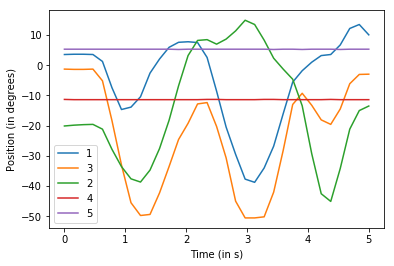

In [15]:
r.record()
r.plot(plt.axes())

In [16]:
r.play()

Setting positions {1: 3.616439703184502, 3: -1.326439703184502, 2: -19.920680890446494, 4: -11.350168625052891, 5: 5.240044029687158}
Setting positions {1: 3.65, 3: -1.36, 2: -19.604559653557477, 4: -11.38}
Setting positions {1: -14.436246764812498, 3: -1.3145596535574786}
Setting positions {3: -49.66288445062703, 2: -38.119605728898726}
Setting positions {1: 7.7436773730834085}
Setting positions {2: 8.454191884527441}
Setting positions {3: -12.487008183481844}
Setting positions {5: 5.32}
Setting positions {1: -38.62821864185619}
Setting positions {4: -11.3}
Setting positions {3: -50.51, 2: 7.438071393325204}
Setting positions {4: -11.38}
Setting positions {2: 14.341286210180675}
Setting positions {3: -9.37413270685792, 2: -43.854890270046894, 4: -11.3}
Setting positions {1: 13.041447620752397}
Setting positions {5: 5.239410196269498}
Setting positions {4: -11.38, 5: 5.32}
Setting positions {5: 5.232366652428589}
Setting positions {3: -18.858931693846408, 5: 5.32}
Setting positions {4:

In [ ]:
m = LinearMove(shimi, shimi.neck_lr, -90, 0.2)
m.start()

## Note to self
* Chaining multiple move changes in one Move thread
* Record position direction changes, record velocities

In [ ]:
play_outkast(shimi)

In [ ]:
pos_matrix = np.array(r.positions)
vel_matrix = np.array(r.velocities)

In [ ]:
print(pos_matrix[:,0])
print(vel_matrix[:,0])